<a href="https://colab.research.google.com/github/Bewsure/PM10/blob/main/pandas_groupby_date_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Average stock market indices by date interval
* stock market index: https://stooq.com/

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

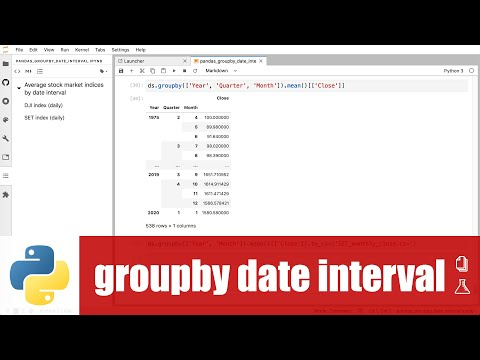

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('rciKuP7VeHQ', width=720, height=405)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
print(f'pandas version:  {pd.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version:  0.25.3
seaborn version: 0.9.0


In [ ]:
pd.Timestamp.now()

Timestamp('2020-01-11 16:11:03.035738')

--- 

## DJI index (daily)

In [ ]:
dj=pd.read_csv('https://stooq.com/q/d/l/?s=^dji&i=d', parse_dates=['Date'])
dj

,Date,Open,High,Low,Close,Volume
0,1896-05-27,29.39,29.39,29.39,29.39,NaN
1,1896-05-28,29.11,29.11,29.11,29.11,NaN
2,1896-05-29,29.43,29.43,29.43,29.43,NaN
3,1896-06-01,29.40,29.40,29.40,29.40,NaN
4,1896-06-02,29.00,29.00,29.00,29.00,NaN
...,...,...,...,...,...,...
32039,2020-01-06,28465.50,28708.02,28418.63,28703.38,79138409.0
32040,2020-01-07,28639.18,28685.50,28565.28,28583.68,71315716.0
32041,2020-01-08,28556.14,28866.18,28522.51,28745.09,80874288.0
32042,2020-01-09,28851.97,28988.01,28844.31,28956.90,76677161.0


In [ ]:
dj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32044 entries, 0 to 32043
Data columns (total 6 columns):
Date      32044 non-null datetime64[ns]
Open      32044 non-null float64
High      32044 non-null float64
Low       32044 non-null float64
Close     32044 non-null float64
Volume    23595 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.5 MB


In [ ]:
dj['Date'].dt.year

0        1896
1        1896
2        1896
3        1896
4        1896
         ... 
32039    2020
32040    2020
32041    2020
32042    2020
32043    2020
Name: Date, Length: 32044, dtype: int64

### average by year

In [ ]:
dj.groupby(dj['Date'].dt.year).mean()['Close']

Date
1896       26.700719
1897       32.855458
1898       37.933730
1899       51.390202
1900       44.222880
            ...     
2016    17927.107341
2017    21750.203904
2018    25053.949960
2019    26379.587024
2020    28759.500000
Name: Close, Length: 125, dtype: float64

### average by year, month

In [ ]:
dj.groupby([dj['Date'].dt.year, dj['Date'].dt.month]).mean()['Close']

Date  Date
1896  5          29.310000
      6          28.322273
      7          23.836957
      8          22.111905
      9          25.338095
                  ...     
2019  9       26900.214000
      10      26736.796087
      11      27797.046000
      12      28167.005714
2020  1       28759.500000
Name: Close, Length: 1481, dtype: float64

In [ ]:
dg=dj.groupby([dj['Date'].dt.year, dj['Date'].dt.month]).mean()['Close'].to_frame()
dg

Close
Date Date              
1896 5        29.310000
     6        28.322273
     7        23.836957
     8        22.111905
     9        25.338095
...                 ...
2019 9     26900.214000
     10    26736.796087
     11    27797.046000
     12    28167.005714
2020 1     28759.500000

[1481 rows x 1 columns]

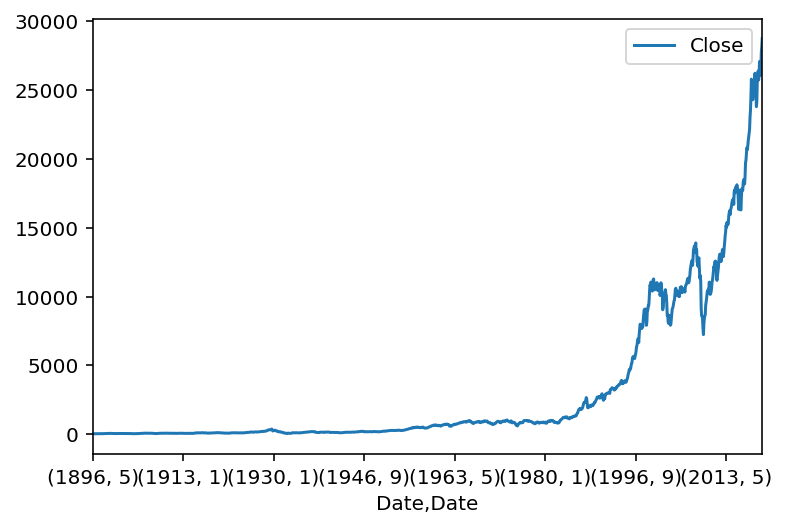

In [ ]:
dg.plot()

In [ ]:
dj['Date'].dt.year

0        1896
1        1896
2        1896
3        1896
4        1896
         ... 
32039    2020
32040    2020
32041    2020
32042    2020
32043    2020
Name: Date, Length: 32044, dtype: int64

### create extra columns to store year, quarter, month, week

In [ ]:
dj['Year']=dj['Date'].dt.year
dj

,Date,Open,High,Low,Close,Volume,Year
0,1896-05-27,29.39,29.39,29.39,29.39,NaN,1896
1,1896-05-28,29.11,29.11,29.11,29.11,NaN,1896
2,1896-05-29,29.43,29.43,29.43,29.43,NaN,1896
3,1896-06-01,29.40,29.40,29.40,29.40,NaN,1896
4,1896-06-02,29.00,29.00,29.00,29.00,NaN,1896
...,...,...,...,...,...,...,...
32039,2020-01-06,28465.50,28708.02,28418.63,28703.38,79138409.0,2020
32040,2020-01-07,28639.18,28685.50,28565.28,28583.68,71315716.0,2020
32041,2020-01-08,28556.14,28866.18,28522.51,28745.09,80874288.0,2020
32042,2020-01-09,28851.97,28988.01,28844.31,28956.90,76677161.0,2020


In [ ]:
dj['Quarter']=dj['Date'].dt.quarter
dj['Month']=dj['Date'].dt.month
dj['Week']=dj['Date'].dt.week
dj

,Date,Open,High,Low,Close,Volume,Year,Quarter,Month,Week
0,1896-05-27,29.39,29.39,29.39,29.39,NaN,1896,2,5,22
1,1896-05-28,29.11,29.11,29.11,29.11,NaN,1896,2,5,22
2,1896-05-29,29.43,29.43,29.43,29.43,NaN,1896,2,5,22
3,1896-06-01,29.40,29.40,29.40,29.40,NaN,1896,2,6,23
4,1896-06-02,29.00,29.00,29.00,29.00,NaN,1896,2,6,23
...,...,...,...,...,...,...,...,...,...,...
32039,2020-01-06,28465.50,28708.02,28418.63,28703.38,79138409.0,2020,1,1,2
32040,2020-01-07,28639.18,28685.50,28565.28,28583.68,71315716.0,2020,1,1,2
32041,2020-01-08,28556.14,28866.18,28522.51,28745.09,80874288.0,2020,1,1,2
32042,2020-01-09,28851.97,28988.01,28844.31,28956.90,76677161.0,2020,1,1,2


In [ ]:
dj.groupby(['Year']).mean()['Close']

Year
1896       26.700719
1897       32.855458
1898       37.933730
1899       51.390202
1900       44.222880
            ...     
2016    17927.107341
2017    21750.203904
2018    25053.949960
2019    26379.587024
2020    28759.500000
Name: Close, Length: 125, dtype: float64

In [ ]:
dj.groupby(['Year']).max()['Close']

Year
1896       32.52
1897       40.43
1898       44.16
1899       56.21
1900       51.45
          ...   
2016    19974.62
2017    24837.51
2018    26828.39
2019    28645.26
2020    28956.90
Name: Close, Length: 125, dtype: float64

In [ ]:
dj.groupby(['Year']).min()['Volume']

Year
1896           NaN
1897           NaN
1898           NaN
1899           NaN
1900           NaN
           ...    
2016    45897884.0
2017    36736260.0
2018    45312027.0
2019    25123910.0
2020    71315716.0
Name: Volume, Length: 125, dtype: float64

In [ ]:
dj.groupby(['Year', 'Quarter']).mean()['Close']

Year  Quarter
1896  2             28.440800
      3             23.764615
      4             29.039524
1897  1             29.906885
      2             29.284355
                     ...     
2019  1          25147.438525
      2          26095.563333
      3          26675.739688
      4          27537.411719
2020  1          28759.500000
Name: Close, Length: 496, dtype: float64

In [ ]:
dj.groupby(['Year', 'Month']).mean()['Close']

Year  Month
1896  5           29.310000
      6           28.322273
      7           23.836957
      8           22.111905
      9           25.338095
                   ...     
2019  9        26900.214000
      10       26736.796087
      11       27797.046000
      12       28167.005714
2020  1        28759.500000
Name: Close, Length: 1481, dtype: float64

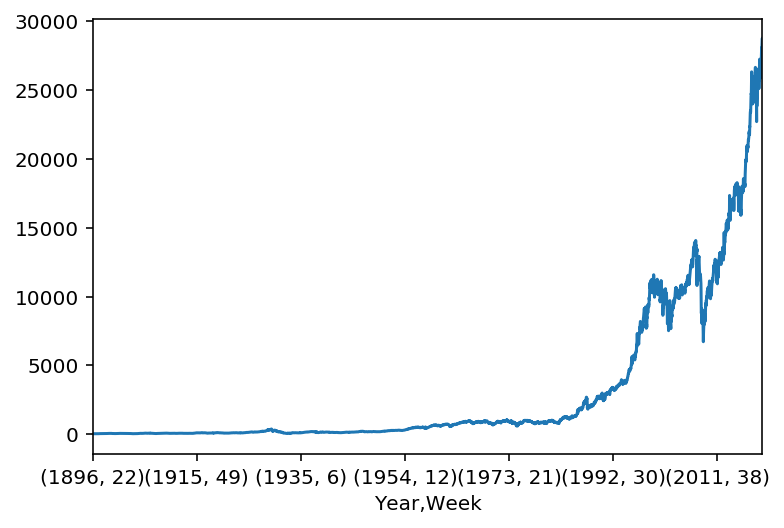

In [ ]:
dj.groupby(['Year', 'Week']).mean()['Close'].plot()

## SET index (daily)

In [ ]:
ds=pd.read_csv('https://stooq.com/q/d/l/?s=^set&i=d', parse_dates=['Date'], index_col='Date')
ds

,Open,High,Low,Close,Volume
Date,,,,,
1975-04-30,100.00,100.00,100.00,100.00,NaN
1975-05-30,89.98,89.98,89.98,89.98,NaN
1975-06-30,91.64,91.64,91.64,91.64,NaN
1975-07-31,98.02,98.02,98.02,98.02,NaN
1975-08-29,98.39,98.39,98.39,98.39,NaN
...,...,...,...,...,...
2020-01-06,1584.13,1585.56,1565.93,1568.50,4.112240e+09
2020-01-07,1578.52,1585.44,1570.04,1585.23,3.193319e+09
2020-01-08,1569.82,1572.03,1555.75,1559.27,3.615450e+09


### working with date index

In [ ]:
ds.index.year

Int64Index([1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1976,
            ...
            2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=8107)

### create index from date interval

In [ ]:
ds.set_index([ds.index.year, ds.index.quarter, ds.index.month, ds.index.week], inplace=True)

In [ ]:
ds

Open     High      Low    Close        Volume
Date Date Date Date                                                  
1975 2    4    18     100.00   100.00   100.00   100.00           NaN
          5    22      89.98    89.98    89.98    89.98           NaN
          6    27      91.64    91.64    91.64    91.64           NaN
     3    7    31      98.02    98.02    98.02    98.02           NaN
          8    35      98.39    98.39    98.39    98.39           NaN
...                      ...      ...      ...      ...           ...
2020 1    1    2     1584.13  1585.56  1565.93  1568.50  4.112240e+09
               2     1578.52  1585.44  1570.04  1585.23  3.193319e+09
               2     1569.82  1572.03  1555.75  1559.27  3.615450e+09
               2     1572.74  1581.50  1568.16  1579.64  3.871441e+09
               2     1583.48  1584.16  1573.80  1580.63           NaN

[8107 rows x 5 columns]

In [ ]:
ds.index.names

FrozenList(['Date', 'Date', 'Date', 'Date'])

In [ ]:
ds.index.names=['Year', 'Quarter', 'Month', 'Week']
ds

Open     High      Low    Close        Volume
Year Quarter Month Week                                                  
1975 2       4     18     100.00   100.00   100.00   100.00           NaN
             5     22      89.98    89.98    89.98    89.98           NaN
             6     27      91.64    91.64    91.64    91.64           NaN
     3       7     31      98.02    98.02    98.02    98.02           NaN
             8     35      98.39    98.39    98.39    98.39           NaN
...                          ...      ...      ...      ...           ...
2020 1       1     2     1584.13  1585.56  1565.93  1568.50  4.112240e+09
                   2     1578.52  1585.44  1570.04  1585.23  3.193319e+09
                   2     1569.82  1572.03  1555.75  1559.27  3.615450e+09
                   2     1572.74  1581.50  1568.16  1579.64  3.871441e+09
                   2     1583.48  1584.16  1573.80  1580.63           NaN

[8107 rows x 5 columns]

In [ ]:
ds.groupby(['Year']).mean()

,Open,High,Low,Close,Volume
Year,,,,,
1975,92.707778,92.707778,92.707778,92.707778,NaN
1976,79.904167,79.904167,79.904167,79.904167,NaN
1977,131.540833,131.540833,131.540833,131.540833,NaN
1978,206.515833,206.515833,206.515833,206.515833,NaN
1979,183.179167,183.179167,183.179167,183.179167,NaN
1980,127.665000,127.665000,127.665000,127.665000,NaN
1981,114.223333,114.223333,114.223333,114.223333,NaN
1982,113.630000,113.630000,113.630000,113.630000,NaN
1983,136.821667,136.821667,136.821667,136.821667,NaN


In [ ]:
ds.groupby(['Year']).mean()['Close']

Year
1975      92.707778
1976      79.904167
1977     131.540833
1978     206.515833
1979     183.179167
1980     127.665000
1981     114.223333
1982     113.630000
1983     136.821667
1984     134.345000
1985     147.023333
1986     152.220833
1987     339.033053
1988     407.555583
1989     589.218156
1990     830.909388
1991     733.072634
1992     797.790366
1993    1019.429713
1994    1395.060490
1995    1294.209512
1996    1165.634426
1997     596.952267
1998     351.078204
1999     421.087102
2000     341.532105
2001     303.487265
2002     366.173796
2003     484.642753
2004     663.328490
2005     691.947306
2006     719.202634
2007     768.061469
2008     686.153239
2009     584.575226
2010     850.556296
2011    1025.514016
2012    1208.758612
2013    1461.450327
2014    1460.041837
2015    1460.301399
2016    1433.014303
2017    1612.386926
2018    1720.552204
2019    1639.896066
2020    1580.580000
Name: Close, dtype: float64

In [ ]:
ds.groupby(['Year']).mean()[['Close']]

,Close
Year,
1975,92.707778
1976,79.904167
1977,131.540833
1978,206.515833
1979,183.179167
1980,127.665000
1981,114.223333
1982,113.630000
1983,136.821667


In [ ]:
ds.groupby(['Year', 'Quarter', 'Month']).mean()[['Close']]

Close
Year Quarter Month             
1975 2       4       100.000000
             5        89.980000
             6        91.640000
     3       7        98.020000
             8        98.390000
...                         ...
2019 3       9      1651.710952
     4       10     1614.911429
             11     1611.471429
             12     1566.578421
2020 1       1      1580.580000

[538 rows x 1 columns]

### save monthly average to CSV

In [ ]:
ds.groupby(['Year', 'Month']).mean()[['Close']].to_csv('SET_monthly_close.csv')